1. Understand the Dataset

Introduction: This dataset is a synthetic representation of mobile money transactions created using PaySim, simulating real-world financial activities and fraudulent behaviors. It spans a simulated period of 30 days and includes various transaction types.
** Structure**
step: Unit of time, 1 step = 1 hour.
type: Transaction type (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER). amount: Transaction amount.
nameOrig: Initiator of the transaction.
oldbalanceOrg: Initial balance before the transaction (not for fraud analysis).
newbalanceOrig: New balance after the transaction (not for fraud analysis).
nameDest: Recipient of the transaction.
oldbalanceDest: Initial recipient's balance before the transaction (not for fraud analysis).
newbalanceDest: New recipient's balance after the transaction (not for fraud analysis).
isFraud: Indicator if the transaction is fraudulent.
isFlaggedFraud: Indicator if the transaction is flagged for potential fraud.

2. Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
df= pd.read_csv("Synthetic_Financial_datasets_log.csv")

# Check the first five rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


3. Initial Data Exploration

In [2]:
# Check the shape of the data
df.shape

(6362620, 11)

In [3]:
 # Summary statistics for numerical variables
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
# Check the missing values in the data
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values

In [5]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


step, isFraud and isFlaggedFraud are integer type of data, other type of data is object and it indicates generally they are categorical data. In machine learning, we need to convert categorical data into numerical data.

4. Data Cleaning and Encoding Categorical Variables

In [6]:
# Delete unrelevant columns
df = df.drop(columns=["oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])

# Convert 'type' column into numerical data via One-Hot Encoding
df_dummies_type = pd.get_dummies(df['type'], prefix='type', dtype=int)

# Drop the original 'type' column and add the new dummy columns
df = df.drop('type', axis=1).join(df_dummies_type)

# Check the head
df.head()


,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,M1979787155,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,M2044282225,0,0,0,0,0,1,0
2,1,181.00,C1305486145,C553264065,1,0,0,0,0,0,1
3,1,181.00,C840083671,C38997010,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,M1230701703,0,0,0,0,0,1,0


5. Exploratory Data Analysis (EDA)

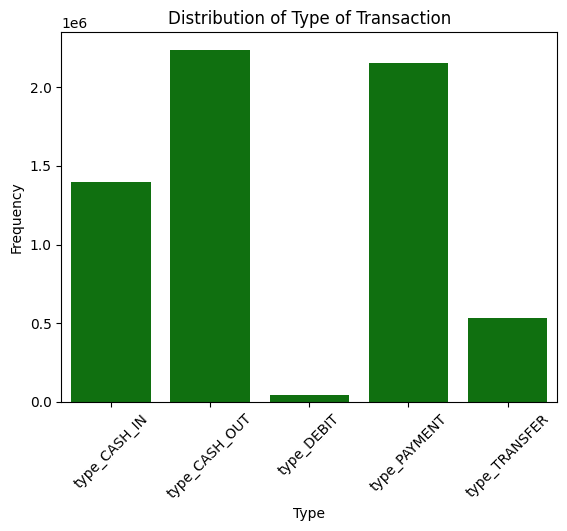

In [8]:
# Count the frequency of each transaction type
transaction_counts = df_dummies_type.sum().reset_index()
transaction_counts.columns = ['Type', 'Frequency']

# Create the bar plot
sns.barplot(x='Type', y='Frequency', data=transaction_counts, color='green')
plt.xticks(rotation=45)
plt.title('Distribution of Type of Transaction')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()